In [27]:
import pandas as pd

df = pd.read_csv("credit_cards.csv")

print("Premieres lignes des donnees: ")
print(df.head())

print("\nRésumé statistique des donnees: ")
print(df.describe())


Premieres lignes des donnees: 
  CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1    

<Figure size 1200x1200 with 0 Axes>

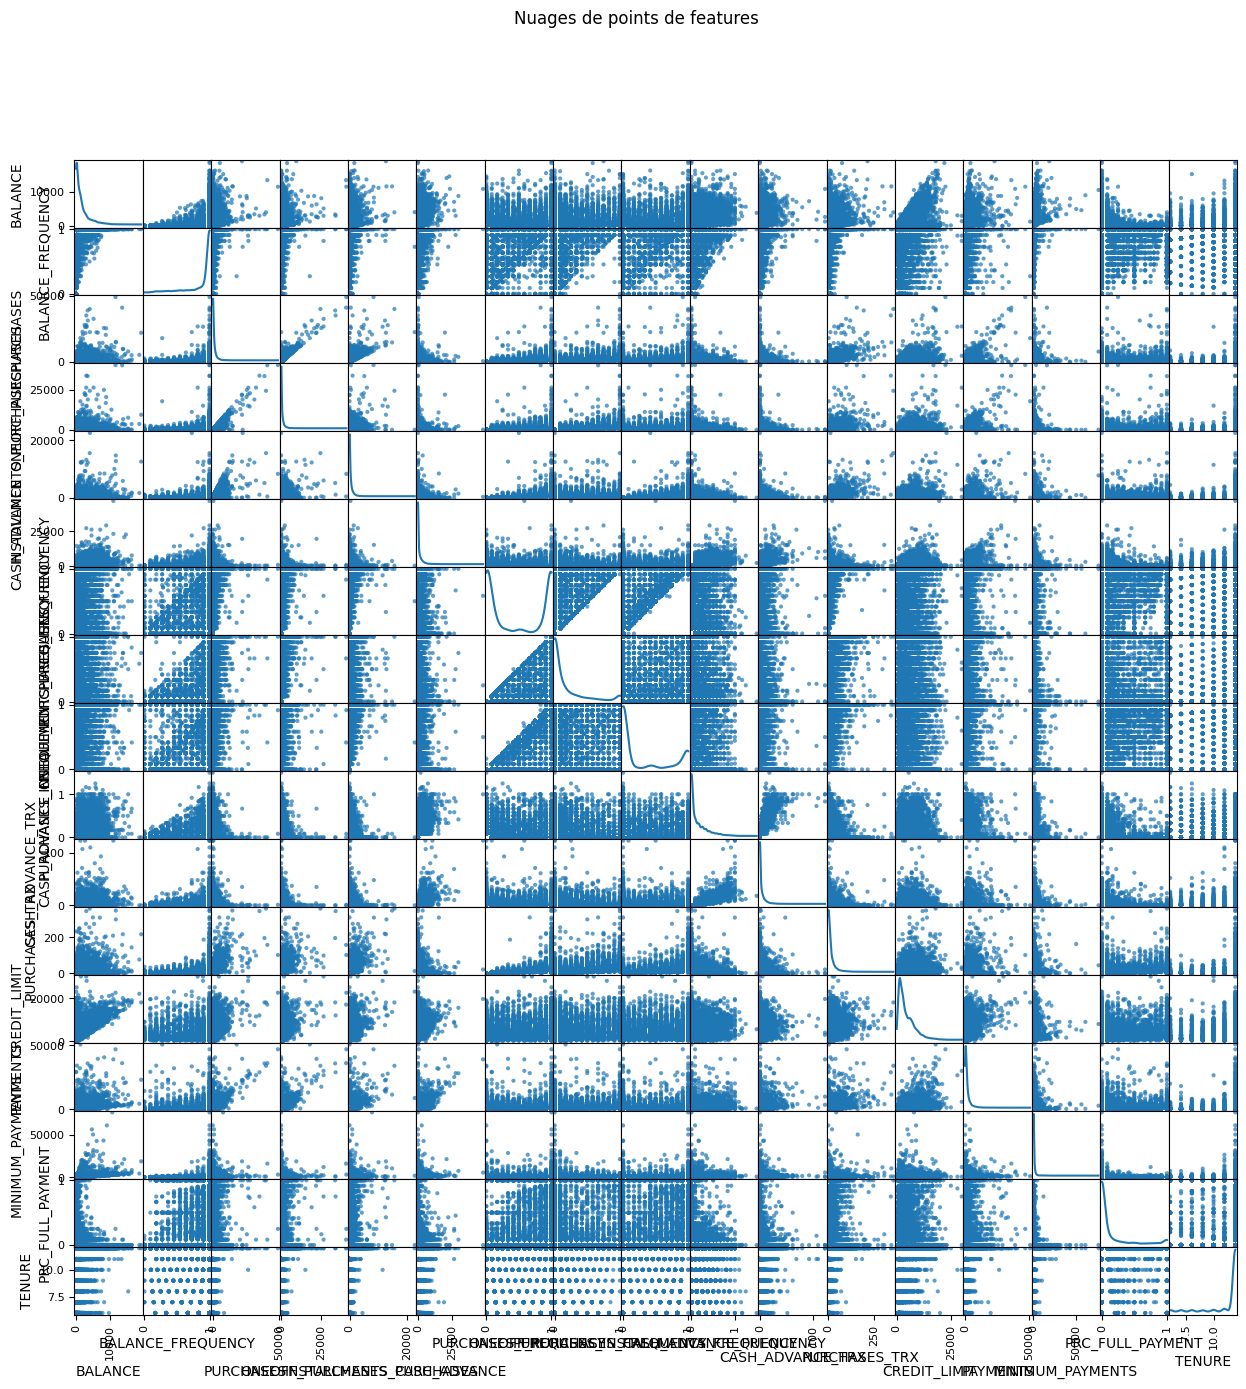

In [14]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

# Affichage des relations entre les variables avec scatter_matrix
plt.figure(figsize=(12,12))
scatter_matrix(df, figsize=(15,15), diagonal='kde', alpha=0.7)
plt.suptitle("Nuages de points de features")
plt.show()

In [36]:
# Exclure la colonne 'CUST_ID' qui contient des chaînes
df_numeric = df.drop('CUST_ID', axis=1)

# Vérifier les données après suppression
print(df_numeric.head())

# Remplacer toutes les valeurs par la moyenne des colonnes
df_numeric_filled = df_numeric.apply(lambda col: col.fillna(col.mean()), axis=0)


print('\n\n\n')
# Vérifier le DataFrame après remplissage
print(df_numeric_filled.head())

# Vérifier à nouveau qu'il n'y a plus de NaN
print(df_numeric_filled.isna().sum())

       BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                

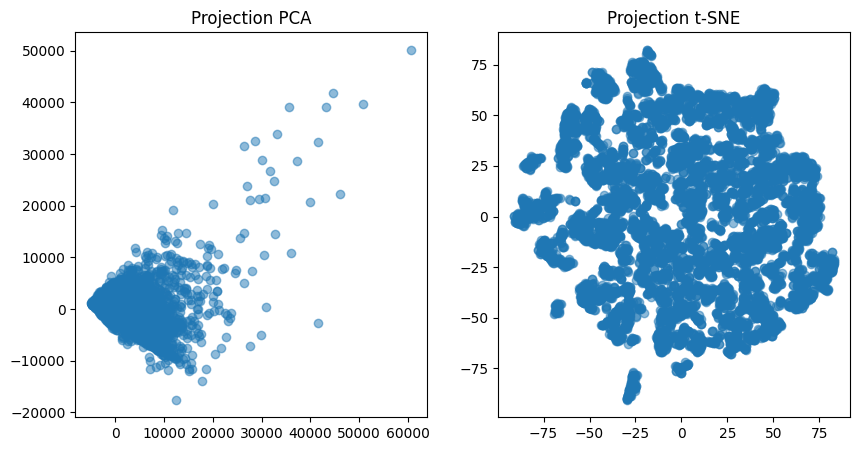

In [37]:
# PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_numeric_filled)

# t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(df_numeric_filled)

# Visualisation
plt.figure(figsize=(10, 5))

# PCA Plot
plt.subplot(1, 2, 1)
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5)
plt.title("Projection PCA")

# t-SNE Plot
plt.subplot(1, 2, 2)
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], alpha=0.5)
plt.title("Projection t-SNE")

plt.show()


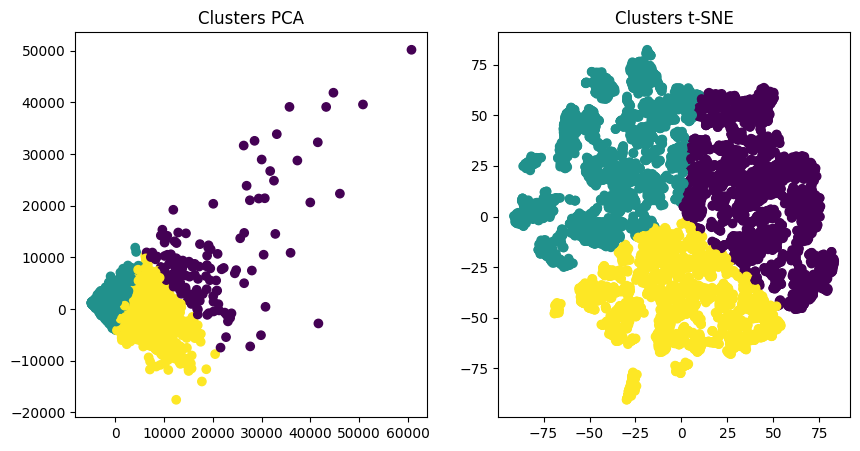

In [38]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# K-Means sur PCA
kmeans_pca = KMeans(n_clusters=3, random_state=42)  # Exemple avec 3 clusters
kmeans_pca.fit(pca_result)
pca_clusters = kmeans_pca.labels_

# K-Means sur t-SNE
kmeans_tsne = KMeans(n_clusters=3, random_state=42)  # Exemple avec 3 clusters
kmeans_tsne.fit(tsne_result)
tsne_clusters = kmeans_tsne.labels_

# Visualisation des clusters PCA
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=pca_clusters, cmap='viridis')
plt.title('Clusters PCA')

# Visualisation des clusters t-SNE
plt.subplot(1, 2, 2)
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=tsne_clusters, cmap='viridis')
plt.title('Clusters t-SNE')

plt.show()


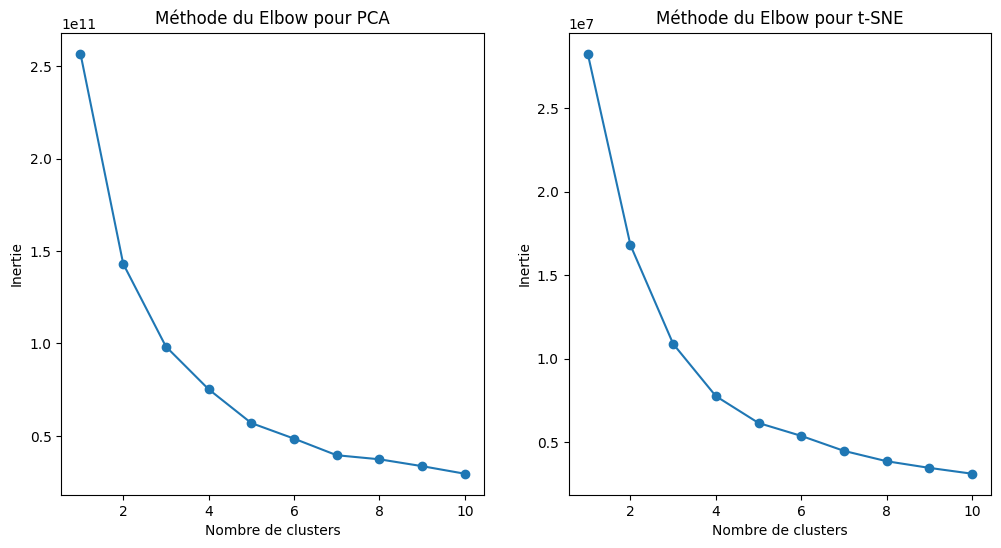

In [39]:
# Méthode du Elbow pour PCA
inertia_pca = []
for k in range(1, 11):
    kmeans_pca = KMeans(n_clusters=k, random_state=42)
    kmeans_pca.fit(pca_result)
    inertia_pca.append(kmeans_pca.inertia_)

# Méthode du Elbow pour t-SNE
inertia_tsne = []
for k in range(1, 11):
    kmeans_tsne = KMeans(n_clusters=k, random_state=42)
    kmeans_tsne.fit(tsne_result)
    inertia_tsne.append(kmeans_tsne.inertia_)

# Tracer la courbe Elbow pour PCA
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, 11), inertia_pca, marker='o')
plt.title('Méthode du Elbow pour PCA')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')

# Tracer la courbe Elbow pour t-SNE
plt.subplot(1, 2, 2)
plt.plot(range(1, 11), inertia_tsne, marker='o')
plt.title('Méthode du Elbow pour t-SNE')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')

plt.show()


In [41]:
import skfuzzy as fuzz
import numpy as np
import matplotlib.pyplot as plt

# Fuzzy C-Means sur PCA
pca_fcm = fuzz.cluster.cmeans(pca_result.T, c=3, m=2, error=0.005, maxiter=1000, init=None)

# Fuzzy C-Means sur t-SNE
tsne_fcm = fuzz.cluster.cmeans(tsne_result.T, c=3, m=2, error=0.005, maxiter=1000, init=None)

# Visualisation des clusters FCM PCA
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=np.argmax(pca_fcm[1], axis=0), cmap='viridis')
plt.title('Clusters Fuzzy C-Means PCA')

# Visualisation des clusters FCM t-SNE
plt.subplot(1, 2, 2)
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=np.argmax(tsne_fcm[1], axis=0), cmap='viridis')
plt.title('Clusters Fuzzy C-Means t-SNE')

plt.show()


ModuleNotFoundError: No module named 'skfuzzy'